## Loading Required libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

## Loading Data

In [32]:
train_transactions=pd.read_pickle('../data/transactions_sample.pkl')

In [33]:
train_transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
519050,3506050,0,13626390,44.00,9992,455.0,150.0,126.0,143.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101510,3088510,0,2048542,50.00,12883,404.0,150.0,226.0,387.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86241,3073241,1,1816041,250.00,10486,514.0,150.0,219.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74832,3061832,0,1641841,515.65,17188,321.0,150.0,226.0,299.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112387,3099387,0,2184361,36.95,7005,111.0,150.0,226.0,310.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59054 entries, 519050 to 255462
Columns: 380 entries, TransactionID to V339
dtypes: float64(376), int64(4)
memory usage: 171.7 MB


<div align='left'><font size='4' color='#229954'>Target variable</font></div>


In [35]:
train_transactions['isFraud'].value_counts(1)

0    0.964693
1    0.035307
Name: isFraud, dtype: float64

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

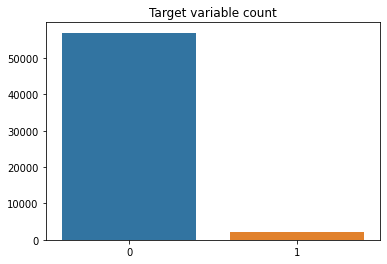

In [36]:
x=train_transactions['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')


In [37]:
train_transactions.drop(columns  = ["TransactionID","TransactionDT"],inplace=True)

In [38]:
target = "isFraud"

In [39]:
X = train_transactions.drop(target,axis=1)
y = train_transactions[target]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

In [43]:
X_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)


## [Resampling](#5)<a id="5"></a> <br>


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

### Oversample minority class

In [44]:
from imblearn.over_sampling import RandomOverSampler


In [45]:
ran=RandomOverSampler()
X_ran_over, y_ran_over= ran.fit_resample(X_train,y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

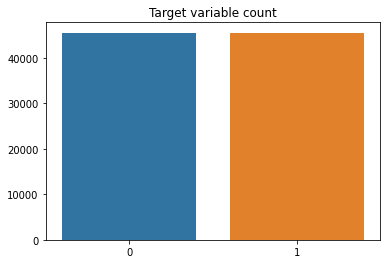

In [46]:
x=y_ran_over.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

###  Undersample majority class 


In [47]:
from imblearn.under_sampling import RandomUnderSampler


In [48]:
ran=RandomUnderSampler()
X_ran_under, y_ran_under= ran.fit_resample(X_train,y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

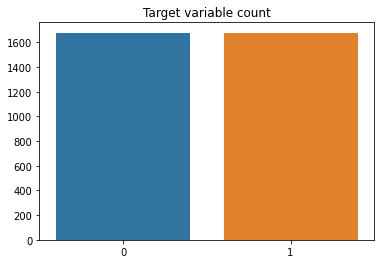

In [49]:
x=y_ran_under.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(sampling_strategy='minority')

In [52]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

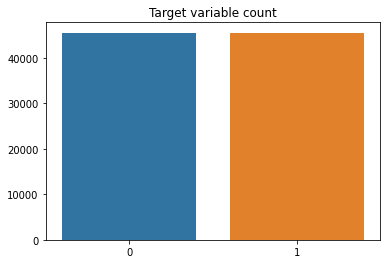

In [53]:
x=y_sm.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


<AxesSubplot:xlabel='p0', ylabel='p1'>

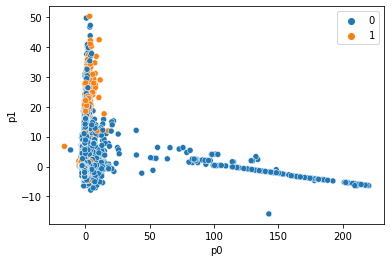

In [55]:
standar = StandardScaler()
X_train_std = pd.DataFrame(standar.fit_transform(X_train),columns = X_train.columns)

pca = PCA(2)
X_train_pca =pd.DataFrame( pca.fit_transform(X_train_std),columns = ["p0","p1"])

sns.scatterplot(data = X_train_pca,x="p0",y="p1",hue=y_train.values)

In [26]:
def evaluate_sampling(X_ran,y_ran,X_test,y_test):
    model  = LogisticRegression(solver='liblinear')
    model.fit(X_ran,y_ran)
    print(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print(f1_score(y_test,model.predict(X_test)))    
    print(confusion_matrix(y_test,model.predict(X_test)))    
    

In [56]:
evaluate_sampling(X_train,y_train, X_test,y_test)

0.725560369123386
0.0
[[11401     4]
 [  406     0]]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
evaluate_sampling(X_ran_over,y_ran_over, X_test,y_test)

0.7737317052627942
0.1596794081381011
[[8826 2579]
 [ 147  259]]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
evaluate_sampling(X_ran_under,y_ran_under, X_test,y_test)

0.7684645918413624
0.16252821670428894
[[8962 2443]
 [ 154  252]]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
evaluate_sampling(X_sm,y_sm, X_test,y_test)

0.7659589930092885
0.15989927604658483
[[8888 2517]
 [ 152  254]]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
